In [1]:
import os
print(os.listdir("../input"))

['train.csv', 'sample_submission.csv', 'test_labels.csv', 'test.csv']


# Libraries

In [2]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords') #one-time
nltk.download('wordnet') #one-time

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#importing files
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
#instatiate
wnl = WordNetLemmatizer()
ps = PorterStemmer()

# Getting the Data

In [4]:
#import training data
df = pd.read_csv('../input/train.csv', quotechar='"', skipinitialspace=True)
df.head(13)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [5]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

# Basic Data Exploration

In [7]:
cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [8]:
#basic data exploration
ones = df.iloc[:,[2,3,4,5,6,7]].apply(pd.value_counts)
ones = ones.values
ones

array([[144277, 157976, 151122, 159093, 151694, 158166],
       [ 15294,   1595,   8449,    478,   7877,   1405]])

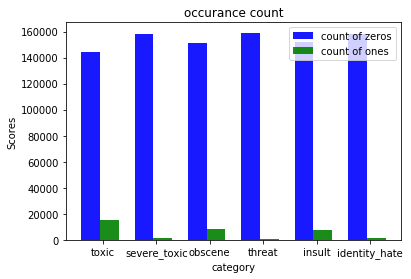

In [9]:
#bar-plot to compare the count of ones and zeros
index = np.arange(6)
width = 0.35
op = 0.9
plt.bar(index, ones[0], width, alpha=op, color='blue',label='count of zeros')
plt.bar(index + width, ones[1], width, alpha=op, color='green', label='count of ones')
plt.xlabel('category')
plt.ylabel('Scores')
plt.title('occurance count')
plt.xticks(index + (width/1.5), cols)
plt.legend()
plt.show()

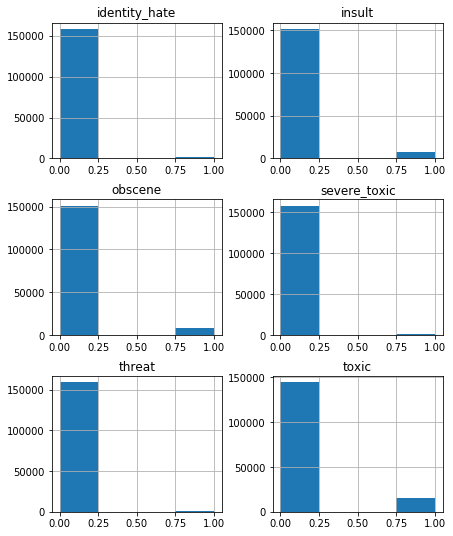

In [10]:
#column-wise histogram plot 
hist = df.hist(column=cols, figsize=(7,9), bins=4)

# Data Preprocessing

In [11]:
#separating out the comment_text
comments = df.iloc[:,1].values
comments[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [12]:
print(len(comments[0]))

264


In [13]:
#original string length count
lengths = df.comment_text.str.len()
lengths

0          264
1          112
2          233
3          622
4           67
5           65
6           44
7          115
8          472
9           70
10        2875
11          56
12         319
13         819
14         219
15         610
16          57
17          48
18         118
19         440
20         266
21          58
22         543
23          97
24        1409
25         172
26         288
27         343
28         119
29          78
          ... 
159541     346
159542     164
159543      80
159544      19
159545     105
159546     534
159547      30
159548      27
159549      25
159550     173
159551     196
159552      92
159553     888
159554     182
159555     119
159556      57
159557     429
159558     134
159559     357
159560    1889
159561    1147
159562    1015
159563     394
159564     369
159565     653
159566     295
159567      99
159568      81
159569     116
159570     189
Name: comment_text, Length: 159571, dtype: int64

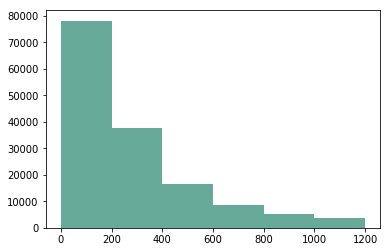

In [14]:
#hist plot for original string lengths
bin_count = (np.arange(7))*200
plt.hist(lengths, bins=bin_count, color='#68aa99')
plt.show()

In [15]:
#trimming the string lengths down
new_comments = df.comment_text.str[:700]
new_lengths = new_comments.str.len()
new_lengths

0         264
1         112
2         233
3         622
4          67
5          65
6          44
7         115
8         472
9          70
10        700
11         56
12        319
13        700
14        219
15        610
16         57
17         48
18        118
19        440
20        266
21         58
22        543
23         97
24        700
25        172
26        288
27        343
28        119
29         78
         ... 
159541    346
159542    164
159543     80
159544     19
159545    105
159546    534
159547     30
159548     27
159549     25
159550    173
159551    196
159552     92
159553    700
159554    182
159555    119
159556     57
159557    429
159558    134
159559    357
159560    700
159561    700
159562    700
159563    394
159564    369
159565    653
159566    295
159567     99
159568     81
159569    116
159570    189
Name: comment_text, Length: 159571, dtype: int64

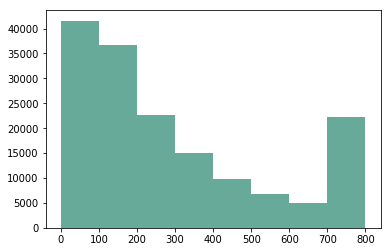

In [16]:
#hist plot for updated string lengths
bin_count = (np.arange(9))*100
plt.hist(new_lengths, bins=bin_count, color='#68aa99')
plt.show()

# Data Cleaning

In [17]:
#cleaning the data
corporus = []
for i in range(0,30000):
    text = re.sub('[^a-zA-Z]', ' ', comments[i])
    text = text.lower().split()
    text = [ps.stem(wnl.lemmatize(word)) for word in set(text) if not word in stopwords.words('english')]
    text = ' '.join(text)
    corporus.append(text)

In [18]:
corporus[0]

'revert explan templat vote sinc doll talk remov retir ga page fac york metallica usernam new made edit vandal fan closur pleas hardcor'

## Data Vectorization

In [19]:
#BoW model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10000)
X = cv.fit_transform(corporus)
X.shape

(30000, 10000)

### Target Matrix

In [20]:
#target matrix
y = df.iloc[:30000, 2:8].values
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [21]:
y.shape

(30000, 6)

---

# RFC Modelling 

In [22]:
#Random Forect Classification (with low estimator count)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 2, criterion='entropy')

In [23]:
#fitting the model
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

---

# Model Validation (on split data)

### Spliting the Data

In [24]:
# NOTE:- X and y are already preprocessed

#split data for Validation
from sklearn.model_selection import train_test_split
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X, y, test_size = 0.15, random_state=0)

### Prediction on split data

In [25]:
#predicted matrix
y_pred_v = rfc.predict(X_test_v)
y_pred_v

array([[0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

### Performance Evaluation

In [26]:
#model performance evaluation with confusion matrix
from sklearn.metrics import confusion_matrix
cm_v = confusion_matrix(y_test_v.argmax(axis=1), y_pred_v.argmax(axis=1))
cm_v

array([[4466,    2,    0,    0,    0],
       [   7,   10,    0,    0,    0],
       [   1,    0,    0,    0,    0],
       [   4,    0,    0,    9,    0],
       [   1,    0,    0,    0,    0]])

In [27]:
#model performance evaluation with accuracy score
from sklearn.metrics import accuracy_score
acc_v = accuracy_score(y_test_v, y_pred_v)*100
acc_v

95.8

---

---

# Model Evaluation (on test data)

### Loading Test Data

In [28]:
#importing test data
test_df = pd.read_csv('../input/test.csv', quotechar='"', skipinitialspace=True)
test_df = test_df.iloc[:10000,1:2]
test_df

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.
5,Thank you for understanding. I think very high...
6,Please do not add nonsense to Wikipedia. Such ...
7,:Dear god this site is horrible.
8,""" \n Only a fool can believe in such numbers. ..."
9,== Double Redirects == \n\n When fixing double...


### Test Data Preprocessing

In [29]:
#trimmed string length
new_test_comments = test_df.comment_text.str[:600]
new_test_lengths = new_test_comments.str.len()
new_test_lengths

0       367
1        50
2        54
3       205
4        41
5        96
6       176
7        32
8       556
9       224
10      119
11      448
12      293
13      501
14      334
15      113
16       24
17      159
18      336
19       38
20       68
21      104
22      115
23      485
24      178
25      600
26      144
27      101
28      209
29      336
       ... 
9970    236
9971    509
9972     30
9973    147
9974    123
9975     33
9976    337
9977    420
9978    171
9979     26
9980    600
9981     43
9982    178
9983    600
9984    600
9985     45
9986     48
9987    443
9988    148
9989    146
9990    250
9991    248
9992    276
9993     48
9994    353
9995     24
9996     23
9997    600
9998    167
9999     31
Name: comment_text, Length: 10000, dtype: int64

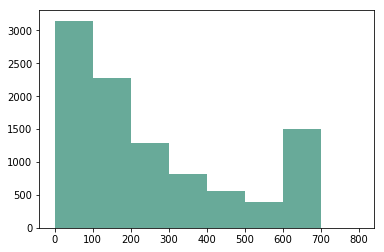

In [30]:
#new hist plot
bin_count = (np.arange(9))*100
plt.hist(new_test_lengths, bins=bin_count, color='#68aa99')
plt.show()

In [31]:
new_test_comments[0]

"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

### Test Data Cleaning

In [32]:
#cleaning the test data
test_corporus = []
for i in range(0,10000):
    text = re.sub('[^a-zA-Z]', ' ', new_test_comments[i])
    text = text.lower().split()
    text = [ps.stem(wnl.lemmatize(word)) for word in set(text) if not word in stopwords.words('english')]
    text = ' '.join(text)
    test_corporus.append(text)

In [33]:
test_corporus[0]

'sad wrong pride right man rule time what slap pethed succes white thing bein tupac face like bitch di get yo ur guy music da kiss boy hate shit next dont fuckin brother nothin sicken ja ever mofucka as'

### Test Data Vectorization

In [34]:
X_test = cv.fit_transform(test_corporus)
X_test.shape

(10000, 10000)

### Prediction on Test Data

In [35]:
#predicted matrix
y_pred = rfc.predict(X_test)
y_pred

array([[1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

### Test Data Labels for evaluation

In [36]:
#imporing tset data labels for evaluation
labels_df = pd.read_csv('../input/test_labels.csv', quotechar='"', skipinitialspace=True)
test_labels = labels_df.iloc[:10000,[1,2,3,4,5,6]].values
test_labels

array([[-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1],
       ...,
       [-1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0]])

In [37]:
test_labels.shape

(10000, 6)

### Performance Evaluation

In [38]:
#model performance evaluation with confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[9933,   51,    6,    3],
       [   2,    0,    0,    0],
       [   2,    0,    0,    0],
       [   3,    0,    0,    0]])

---

# Saving as Pickle

In [40]:
'''
#loading the pickle
rfc_load = joblib.load('rfc_model.pkl')
#verifying the pickle
assert clf.score(X, y) == clf_load.score(X, y)
'''

#saving the model as pickle
from sklearn.externals import joblib
joblib.dump(rfc, 'rfc_model.pkl') 

['rfc_model.pkl']